<a href="https://colab.research.google.com/github/avi-007/Deep-Learning-Work/blob/master/Dogs_vs_Cats_Classify_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
                include_top=False,
                input_shape=(150,150,3))

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


base_dir='/content/cats-and-dogs-small'
train_dir='/content/cats-and-dogs-small/train'
validation_dir='/content/cats-and-dogs-small/validation'
test_dir='/content/cats-and-dogs-small/test'

datagen=ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory,sample_count):
  features=np.zeros(shape=(sample_count,4,4,512))
  labels=np.zeros(shape=(sample_count))
  generator=datagen.flow_from_directory(
      directory,
      target_size=(150,150),
      batch_size=batch_size,
      class_mode='binary'
  )
  i=0
  for inputs_batch,labels_batch in generator:
      features_batch = conv_base.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i += 1
      if i * batch_size >= sample_count:
        break
  return features,labels
train_features,train_labels=extract_features(train_dir,2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [0]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
               metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 562us/step - loss: 0.6054 - acc: 0.6625 - val_loss: 0.4256 - val_acc: 0.8540
Epoch 2/30
2000/2000 [==============================] - 1s 343us/step - loss: 0.4171 - acc: 0.8150 - val_loss: 0.3499 - val_acc: 0.8770
Epoch 3/30
2000/2000 [==============================] - 1s 315us/step - loss: 0.3391 - acc: 0.8525 - val_loss: 0.3201 - val_acc: 0.8770
Epoch 4/30
2000/2000 [==============================] - 1s 383us/step - loss: 0.3098 - acc: 0.8735 - val_loss: 0.2911 - val_acc: 0.8930
Epoch 5/30
2000/2000 [==============================] - 1s 326us/step - loss: 0.2860 - acc: 0.8900 - val_loss: 0.2780 - val_acc: 0.8960
Epoch 6/30
2000/2000 [==============================] - 1s 346us/step - loss: 0.2607 - acc: 0.8960 - val_loss: 0.2672 - val_acc: 0.8940
Epoch 7/30
2000/2000 [==============================] - 1s 328us/step - loss: 0.2487 - acc: 0.9005 - val_loss: 0.2610 - val_acc: 0.8940


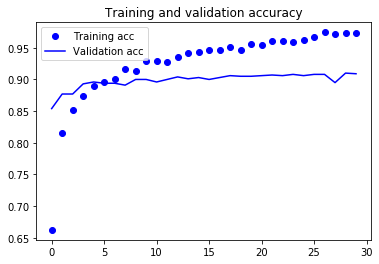

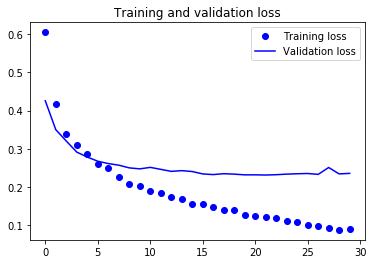

In [0]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [0]:
conv_base.trainable = False

In [0]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')
              

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=20,
                  class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=20,
                        class_mode='binary')
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model.fit_generator(
              train_generator,
              steps_per_epoch=100,
              epochs=30,
              validation_data=validation_generator,
              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 21s 208ms/step - loss: 0.5914 - acc: 0.6915 - val_loss: 0.4696 - val_acc: 0.7990
Epoch 2/30
100/100 [==============================] - 19s 187ms/step - loss: 0.4859 - acc: 0.7765 - val_loss: 0.4006 - val_acc: 0.8320
Epoch 3/30
100/100 [==============================] - 19s 186ms/step - loss: 0.4371 - acc: 0.8050 - val_loss: 0.3438 - val_acc: 0.8630
Epoch 4/30
100/100 [==============================] - 19s 190ms/step - loss: 0.4042 - acc: 0.8250 - val_loss: 0.3102 - val_acc: 0.8760
Epoch 5/30
100/100 [==============================] - 19s 189ms/step - loss: 0.3823 - acc: 0.8370 - val_loss: 0.2983 - val_acc: 0.8730
Epoch 6/30
100/100 [==============================] - 19s 188ms/step - loss: 0.3807 - acc: 0.8370 - val_loss: 0.2869 - val_acc: 0.8820
Epoch 7/30
100/100 [==============================] - 19s 185ms/step - loss: 0.3581 - acc: 0.8445 - val_lo

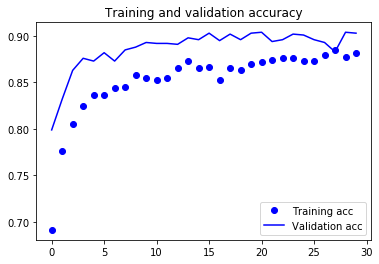

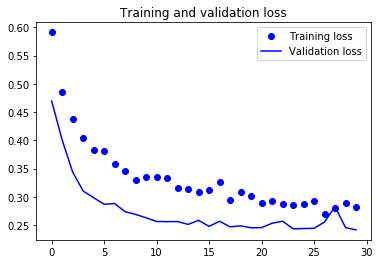

In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/100
100/100 [==============================] - 21s 209ms/step - loss: 0.2969 - acc: 0.8730 - val_loss: 0.2357 - val_acc: 0.9000
Epoch 2/100
100/100 [==============================] - 19s 187ms/step - loss: 0.2600 - acc: 0.8915 - val_loss: 0.2098 - val_acc: 0.9180
Epoch 3/100
100/100 [==============================] - 19s 187ms/step - loss: 0.2440 - acc: 0.8960 - val_loss: 0.2130 - val_acc: 0.9120
Epoch 4/100
100/100 [==============================] - 18s 185ms/step - loss: 0.2377 - acc: 0.9010 - val_loss: 0.2268 - val_acc: 0.9140
Epoch 5/100
100/100 [==============================] - 19s 188ms/step - loss: 0.2086 - acc: 0.9110 - val_loss: 0.2581 - val_acc: 0.9010
Epoch 6/100
100/100 [==============================] - 19s 187ms/step - loss: 0.1975 - acc: 0.9230 - val_loss: 0.1840 - val_acc: 0.9250
Epoch 7/100
100/100 [==============================] - 19s 187ms/step - loss: 0.2075 - acc: 0.9115 - val_loss: 0.1882 - val_acc: 0.9270
Epoch 8/100
100/100 [===========================

In [0]:
model.save('cats_and_dogs_small_4.h5')

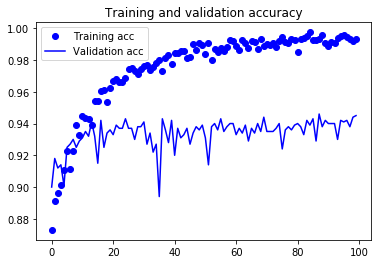

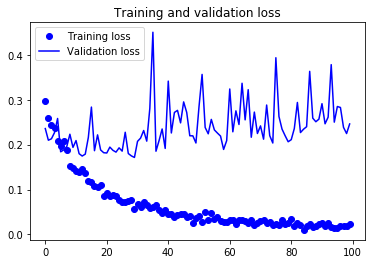

In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

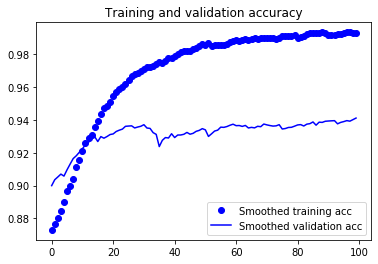

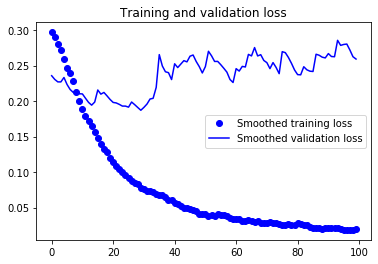

In [0]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9399999940395355
